In [0]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import cv2  
import torchvision
import torchvision.transforms as transforms
import time
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [0]:
file1 = open('/Lane detection/full_CNN_train.p','rb')
image_dataset = pickle.load(file1)
image_dataset = torch.FloatTensor(image_dataset)/255.0
torch.save(image_dataset,'/Lane detection/imageset.pt')
file2 = open('/Lane detection/full_CNN_labels.p','rb')
lable_dataset = pickle.load(file2)
lable_dataset = torch.FloatTensor(lable_dataset)/255.0
torch.save(lable_dataset,'/Lane detection/outputset.pt')

In [0]:
image_dataset = torch.load('/Lane detection/imageset.pt')

In [0]:
lable_dataset = torch.load('/Lane detection/outputset.pt')

In [0]:
a = torch.zeros(lable_dataset.shape, dtype=torch.float32)
output_dataset = torch.cat([a,lable_dataset,a],dim = 3)

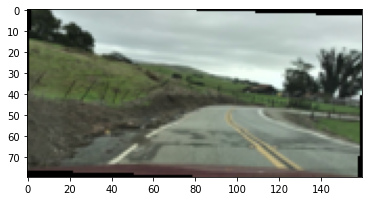

In [0]:
plt.imshow(np.array(image_dataset[10075]))

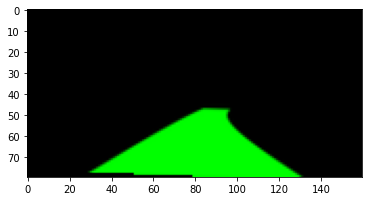

In [0]:
plt.imshow(np.array(output_dataset[10075]))

In [0]:
image_dataset.shape

torch.Size([12764, 80, 160, 3])

In [0]:
lable_dataset.shape

torch.Size([12764, 80, 160, 1])

In [0]:
output_dataset.shape

torch.Size([12764, 80, 160, 3])

In [0]:
 class FCN32s(nn.Module):
    def __init__(self):
        super(FCN32s, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.pool1 = nn.MaxPool2d(kernel_size = 2)
        self.conv4 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.conv5 = nn.Conv2d(in_channels = 32, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.conv6 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.pool2 = nn.MaxPool2d(kernel_size = 2)
        self.conv7 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.conv8 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.conv9 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.pool3 = nn.MaxPool2d(kernel_size = 2)
        self.conv10 = nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.conv11 = nn.Conv2d(in_channels = 256, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1)
        self.conv12 = nn.Conv2d(in_channels = 1024, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1)
        self.pool4 = nn.MaxPool2d(kernel_size = 2)
        self.conv13 = nn.Conv2d(in_channels = 1024, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1)
        self.conv14 = nn.Conv2d(in_channels = 1024, out_channels = 4096, kernel_size = 3, stride = 1, padding = 1)
        self.conv15 = nn.Conv2d(in_channels = 4096, out_channels = 4096, kernel_size = 3, stride = 1, padding = 1)
        self.cotr1 = nn.ConvTranspose2d(in_channels = 4096, out_channels = 4096, kernel_size = 3, stride = 1, padding = 1)
        self.cotr2 = nn.ConvTranspose2d(in_channels = 4096, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1)
        self.cotr3 = nn.ConvTranspose2d(in_channels = 1024, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1)
        self.upsl1 = nn.UpsamplingNearest2d(scale_factor = 2)
        self.cotr4 = nn.ConvTranspose2d(in_channels = 1024, out_channels = 1024, kernel_size = 3, stride = 1, padding = 1)
        self.cotr5 = nn.ConvTranspose2d(in_channels = 1024, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.cotr6 = nn.ConvTranspose2d(in_channels = 256, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.upsl2 = nn.UpsamplingNearest2d(scale_factor = 2)
        self.cotr7 = nn.ConvTranspose2d(in_channels = 256, out_channels = 256, kernel_size = 3, stride = 1, padding = 1)
        self.cotr8 = nn.ConvTranspose2d(in_channels = 256, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.cotr9 = nn.ConvTranspose2d(in_channels = 128, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.upsl3 = nn.UpsamplingNearest2d(scale_factor = 2)
        self.cotr10 = nn.ConvTranspose2d(in_channels = 128, out_channels = 128, kernel_size = 3, stride = 1, padding = 1)
        self.cotr11 = nn.ConvTranspose2d(in_channels = 128, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.cotr12 = nn.ConvTranspose2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.upsl4 = nn.UpsamplingNearest2d(scale_factor = 2)
        self.cotr13 = nn.ConvTranspose2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding = 1)
        self.cotr14 = nn.ConvTranspose2d(in_channels = 32, out_channels = 16, kernel_size = 3, stride = 1, padding = 1)
        self.cotr15 = nn.ConvTranspose2d(in_channels = 16, out_channels = 1, kernel_size = 3, stride = 1, padding = 1)
                
    def forward(self, x):
        x = x.type(torch.FloatTensor)
        x = self.conv2(self.conv1(x))
        x = self.pool1(self.conv3(x) + x)
        x = self.conv5(self.conv4(x) + x)
        x = self.pool2(self.conv6(x) + x)
        x = self.conv8(self.conv7(x) + x)
        x = self.pool3(self.conv9(x) + x)
        x = self.conv11(self.conv10(x) + x)
        x = self.pool4(self.conv12(x) + x)
        x = self.conv14(self.conv13(x) + x)
        x = self.conv15(x) + x
        x = self.cotr2(self.cotr1(x) + x)
        x = self.upsl1(self.cotr3(x) + x)
        x = self.cotr5(self.cotr4(x) + x)
        x = self.upsl2(self.cotr6(x) + x)
        x = self.cotr8(self.cotr7(x) + x)
        x = self.upsl3(self.cotr9(x) + x)
        x = self.cotr11(self.cotr10(x) + x)
        x = self.upsl4(self.cotr12(x) + x)
        x = self.cotr14(self.cotr13(x) + x)
        x = self.cotr15(x) + x
        x = x - x.min()
        x = x / x.max()
        return x

In [0]:
model = FCN32s()
batch_size = 1
lr = 0.0001
Epoch = 5
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [0]:
trainset = []
testset = []
for i in range(int(0.8*len(image_dataset))):
    trainset.append([image_dataset[i],lable_dataset[i]])
for i in range(int(0.8*len(image_dataset)),len(image_dataset)):
    testset.append([image_dataset[i],lable_dataset[i]])
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

In [0]:
PATH = '/Lane detection/Lanemodel001.pt'
model = FCN32s()
model.load_state_dict(torch.load(PATH))
model

FCN32s(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv10): Conv2d(256, 256, kern

In [0]:
PATH = '/Lane detection/Lanemodel001.pt'
for epoch in range(Epoch):
    running_loss = 0.0
    num = 0
    for i, data in enumerate(trainloader, 0):
        optimizer.zero_grad()
        inputs, lables = data
        size = inputs.shape
        inputs = inputs.resize_((size[0],size[3],size[1],size[2]))
        lables = lables.resize_((size[0],1,size[1],size[2]))
        inputs = inputs.type(torch.FloatTensor)
        lables = lables.type(torch.FloatTensor)
        outputs = model(inputs)
        outputs = outputs.type(torch.FloatTensor)
        loss = criterion(outputs, lables)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if num%200 == 199:
            print("Epoch %d :: Loss : %.3f" %(epoch+1,running_loss / num))
            torch.save(model.state_dict(), PATH)
            running_loss = 0.0
            num = 0
        num += 1
print('Finished Training')

In [0]:
PATH = '/Lane detection/Lanemodel001.pt'
torch.save(model.state_dict(), PATH)

In [0]:
running_loss = 0.0
num = 0
for i, data in enumerate(testloader, 0):
    inputs, lables = data
    size = inputs.shape
    inputs = inputs.resize_((size[0],size[3],size[1],size[2]))
    lables = lables.resize_((size[0],1,size[1],size[2]))
    outputs = model(inputs)
    loss = criterion(outputs, lables)
    running_loss += loss.item()
    num += 1
print('Test loss: %.3f' %(running_loss / num))

In [0]:
image = inputs
image = image.resize_(80,160,3)
plt.imshow(np.array(image))

In [0]:
lables = lables.resize_(80,160,1)
a = torch.zeros(lables.shape, dtype = torch.float32)
truth = torch.cat([a,lables,a], dim = 2)
truth = truth.squeeze()
plt.imshow(np.array(truth))

In [0]:
output = (model(inputs).data)
outputs = torch.tensor(np.array(output))
outputs = outputs.resize_(80,160,1)
a = torch.zeros(outputs.shape, dtype = torch.float32)
outputs = torch.cat([a,outputs,a], dim = 2)
outputs = outputs.squeeze()
print(outputs.max())
print(outputs.min())
plt.imshow(np.array(outputs))

In [0]:
size = (80,160)
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

19520


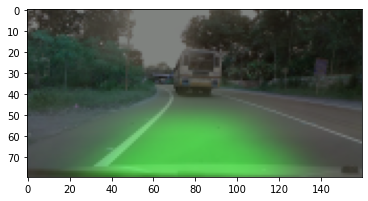

In [0]:
path = "/Lane detection/drive 1.mp4"
cap = cv2.VideoCapture(path) 
count = 0
success = 1
while(1): 
    ret, frame = cap.read()
    if ret == True:
      if count % 1000 == 0:
        img_array = torch.tensor(frame)
        img_array = img_array.resize_(1, 3, 80, 160)
        start = time.time()
        lable_arr = model(img_array).data
        end = time.time()
        output_arr = torch.tensor(np.array(lable_arr))
        output_arr = output_arr.resize_(80, 160, 1)
        a = torch.zeros(output_arr.shape, dtype = torch.float32)
        output_arr = torch.cat([a,output_arr,a], dim = 2)
        output_arr = output_arr.squeeze()
        dim = (160,80)
        resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
        resized = resized/255
        plt.imshow(0.5*(resized+np.array(output_arr)))
        filename = "/Lanes detection/Image "+str(count)+".jpg"
        plt.savefig(filename)
      count += 1  
    else:
      break
print(count)